In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
from sklearn.linear_model import  LinearRegression, ElasticNet, Ridge
from sklearn.metrics import mean_squared_error
from itertools import combinations_with_replacement


# 1

In [2]:
data = pd.read_csv('data\weather_prediction_dataset.csv')

## 1.1 dataset

### 1.1.2

In [3]:
filtered_columns = [col for col in data.columns if 'DATE' in col or 'MONTH' in col or 'TOURS' in col or 'PERPIGNAN' in col or 'MONTELIMAR' in col]
df = data[filtered_columns]
df

,DATE,MONTH,MONTELIMAR_wind_speed,MONTELIMAR_humidity,MONTELIMAR_pressure,MONTELIMAR_global_radiation,MONTELIMAR_precipitation,MONTELIMAR_temp_mean,MONTELIMAR_temp_min,MONTELIMAR_temp_max,...,PERPIGNAN_temp_min,PERPIGNAN_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,3.8,0.85,1.0269,0.30,0.00,5.5,2.5,8.5,...,10.3,14.0,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,5.8,0.82,1.0287,0.54,0.00,8.3,6.8,9.8,...,5.1,14.6,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,0.4,0.92,1.0316,0.53,0.00,3.2,-2.1,8.5,...,4.1,13.2,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,1.1,0.85,1.0274,0.64,0.00,7.2,2.3,12.1,...,4.3,12.8,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,3.4,0.82,1.0234,0.70,0.00,8.2,1.5,14.8,...,3.6,14.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,0.4,0.87,1.0077,0.17,0.00,3.6,0.6,6.6,...,4.1,12.4,3.7,0.95,1.0011,0.22,1.50,6.2,1.8,10.6
3650,20091229,12,1.8,0.84,1.0060,0.33,0.16,9.4,6.0,12.7,...,4.8,14.1,5.3,0.89,0.9966,0.24,0.40,10.4,6.2,14.5
3651,20091230,12,0.9,0.94,1.0006,0.30,0.78,10.8,7.8,13.7,...,9.5,14.3,3.8,0.88,0.9939,0.24,1.00,10.0,8.7,11.3
3652,20091231,12,0.3,0.90,0.9954,0.59,0.66,11.2,6.9,15.4,...,5.3,12.2,4.2,0.88,0.9933,0.58,0.02,8.5,6.2,10.9


In [4]:
df.drop(['DATE','MONTH'],axis=1).describe()

,MONTELIMAR_wind_speed,MONTELIMAR_humidity,MONTELIMAR_pressure,MONTELIMAR_global_radiation,MONTELIMAR_precipitation,MONTELIMAR_temp_mean,MONTELIMAR_temp_min,MONTELIMAR_temp_max,PERPIGNAN_wind_speed,PERPIGNAN_humidity,...,PERPIGNAN_temp_min,PERPIGNAN_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
count,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,...,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000
mean,3.680952,0.690794,1.017094,1.647783,0.253426,14.241215,9.535222,18.948741,4.669376,0.651522,...,11.615900,20.455337,3.677258,0.781872,1.016639,1.369787,0.186100,12.205802,7.860536,16.551779
std,2.133979,0.129024,0.006988,1.007065,0.910761,7.193924,6.326726,8.557584,2.651377,0.149114,...,6.373871,6.974910,1.519866,0.115572,0.018885,0.926472,0.422151,6.467155,5.692256,7.714924
min,0.000000,0.340000,0.986200,0.020000,0.000000,-4.000000,-8.800000,-2.000000,0.800000,0.220000,...,-5.900000,1.300000,0.700000,0.330000,0.000300,0.050000,0.000000,-6.200000,-13.000000,-3.100000
25%,2.000000,0.600000,1.013200,0.750000,0.000000,8.400000,4.600000,12.200000,2.600000,0.540000,...,6.900000,14.900000,2.600000,0.700000,1.012100,0.550000,0.000000,7.600000,3.700000,10.800000
50%,3.100000,0.690000,1.017000,1.520000,0.000000,14.200000,9.600000,18.800000,3.900000,0.650000,...,11.500000,20.300000,3.400000,0.800000,1.017300,1.235000,0.000000,12.300000,8.300000,16.600000
75%,5.100000,0.790000,1.021100,2.550000,0.040000,20.000000,14.800000,25.700000,6.200000,0.770000,...,16.900000,26.000000,4.600000,0.870000,1.022200,2.090000,0.160000,17.200000,12.300000,22.400000
max,13.200000,0.980000,1.038700,3.640000,15.400000,30.800000,24.900000,41.100000,16.300000,0.970000,...,26.300000,38.200000,10.800000,1.000000,1.041400,3.560000,6.200000,31.200000,22.600000,39.800000


### 1.1.4

In [5]:
df_train = df.loc[(df['DATE']<20090101) | (df['DATE']>=20100101)]
df_train = pd.DataFrame(data=df_train.values, columns=df_train.columns)
df_train=df_train.drop(['DATE','MONTH'],axis=1)

df_test = df.loc[(df['DATE']>=20090101) & (df['DATE']<20100101)]
df_test = pd.DataFrame(data=df_test.values, columns=df_test.columns)
df_test=df_test.drop(['DATE','MONTH'],axis=1)


In [6]:
scaler = MinMaxScaler()
scaler.fit(df_train)
df_train_scaled=scaler.transform(df_train)

df_train = pd.DataFrame(data=df_train_scaled,columns=df_train.columns)
df_train

,MONTELIMAR_wind_speed,MONTELIMAR_humidity,MONTELIMAR_pressure,MONTELIMAR_global_radiation,MONTELIMAR_precipitation,MONTELIMAR_temp_mean,MONTELIMAR_temp_min,MONTELIMAR_temp_max,PERPIGNAN_wind_speed,PERPIGNAN_humidity,...,PERPIGNAN_temp_min,PERPIGNAN_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,0.287879,0.796875,0.775238,0.077562,0.000000,0.272989,0.335312,0.243619,0.244898,0.653333,...,0.503106,0.344173,0.08,0.955224,0.986649,0.056980,0.008333,0.383152,0.531915,0.300699
1,0.439394,0.750000,0.809524,0.144044,0.000000,0.353448,0.462908,0.273782,0.142857,0.600000,...,0.341615,0.360434,0.12,0.985075,0.988378,0.034188,0.033333,0.366848,0.513678,0.286713
2,0.030303,0.906250,0.864762,0.141274,0.000000,0.206897,0.198813,0.243619,0.115646,0.840000,...,0.310559,0.322493,0.26,0.865672,0.985880,0.062678,0.000000,0.372283,0.513678,0.296037
3,0.083333,0.796875,0.784762,0.171745,0.000000,0.321839,0.329377,0.327146,0.047619,0.840000,...,0.316770,0.311653,0.41,0.925373,0.981558,0.017094,0.091667,0.385870,0.507599,0.324009
4,0.257576,0.750000,0.708571,0.188366,0.000000,0.350575,0.305638,0.389791,0.122449,0.693333,...,0.295031,0.368564,0.28,0.925373,0.980309,0.096866,0.008333,0.369565,0.507599,0.293706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3284,0.090909,0.703125,0.712381,0.204986,0.000000,0.189655,0.210682,0.206497,0.183673,0.773333,...,0.400621,0.195122,0.45,0.686567,0.981558,0.148148,0.000000,0.114130,0.200608,0.090909
3285,0.136364,0.750000,0.777143,0.119114,0.040260,0.140805,0.169139,0.160093,0.115646,0.800000,...,0.385093,0.224932,0.31,0.805970,0.982903,0.182336,0.000000,0.146739,0.209726,0.144522
3286,0.053030,0.968750,0.807619,0.016620,0.109091,0.264368,0.320475,0.241299,0.054422,0.920000,...,0.295031,0.298103,0.14,0.925373,0.000000,0.042735,0.000000,0.187500,0.300912,0.142191
3287,0.174242,0.843750,0.758095,0.002770,0.010390,0.321839,0.409496,0.262181,0.088435,0.840000,...,0.329193,0.403794,0.32,0.955224,0.985400,0.028490,0.000000,0.149457,0.279635,0.093240


In [7]:
df_test_scaled=scaler.transform(df_test)

df_test = pd.DataFrame(data=df_test_scaled,columns=df_test.columns)
df_test

,MONTELIMAR_wind_speed,MONTELIMAR_humidity,MONTELIMAR_pressure,MONTELIMAR_global_radiation,MONTELIMAR_precipitation,MONTELIMAR_temp_mean,MONTELIMAR_temp_min,MONTELIMAR_temp_max,PERPIGNAN_wind_speed,PERPIGNAN_humidity,...,PERPIGNAN_temp_min,PERPIGNAN_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,0.454545,0.765625,0.716190,0.182825,0.000000,0.232759,0.326409,0.185615,0.054422,0.893333,...,0.409938,0.257453,0.41,0.880597,0.985112,0.048433,0.000000,0.168478,0.297872,0.111888
1,0.484848,0.734375,0.662857,0.038781,0.000000,0.178161,0.311573,0.109049,0.000000,0.826667,...,0.347826,0.246612,0.41,0.895522,0.983767,0.008547,0.000000,0.141304,0.279635,0.081585
2,0.446970,0.531250,0.651429,0.193906,0.000000,0.195402,0.308605,0.141531,0.068027,0.826667,...,0.248447,0.173442,0.52,0.686567,0.982903,0.182336,0.000000,0.149457,0.270517,0.097902
3,0.530303,0.546875,0.640000,0.229917,0.000000,0.166667,0.284866,0.113689,0.251701,0.520000,...,0.273292,0.262873,0.11,0.791045,0.982422,0.179487,0.000000,0.086957,0.151976,0.083916
4,0.454545,0.609375,0.560000,0.127424,0.000000,0.103448,0.186944,0.085847,0.258503,0.533333,...,0.295031,0.211382,0.12,0.880597,0.977620,0.037037,0.033333,0.032609,0.103343,0.027972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.136364,0.593750,0.529524,0.188366,0.000000,0.275862,0.290801,0.283063,0.210884,0.453333,...,0.369565,0.382114,0.38,0.761194,0.968975,0.150997,0.016667,0.277174,0.297872,0.298368
361,0.030303,0.828125,0.409524,0.041551,0.000000,0.218391,0.278932,0.199536,0.061224,0.800000,...,0.310559,0.300813,0.29,0.925373,0.961291,0.048433,0.312500,0.320652,0.367781,0.319347
362,0.136364,0.781250,0.377143,0.085873,0.010390,0.385057,0.439169,0.341067,0.054422,0.866667,...,0.332298,0.346883,0.45,0.835821,0.956969,0.054131,0.083333,0.434783,0.501520,0.410256
363,0.068182,0.937500,0.274286,0.077562,0.050649,0.425287,0.492582,0.364269,0.068027,0.933333,...,0.478261,0.352304,0.30,0.820896,0.954375,0.054131,0.208333,0.423913,0.577508,0.335664


In [8]:
def sliding_window(df, window_size, stride=1):

    # Number of features
    n = df.shape[1]


    num_samples = (df.shape[0] - window_size) // stride + 1

    data = df.values  # Shape: (time_steps, features)

    # Create sliding window view
    windows = np.lib.stride_tricks.sliding_window_view(data, (window_size, n))

    windows = windows.reshape(num_samples,window_size,n)

    # Apply stride by selecting every 'stride' step
    windows = windows[::stride]  # Shape: (num_samples, window_size, n)

    return windows

In [9]:
# sliding window data

x_train_window = sliding_window(df_train,5,1)
x_test_window = sliding_window(df_test,5,1)

y_train_window = df_train.iloc[4:,:].values
y_test_window = df_test.iloc[4:,:].values


print(np.shape(x_train_window))
print(np.shape(x_test_window))
print(np.shape(y_train_window))
print(np.shape(y_test_window))

(3285, 5, 24)
(361, 5, 24)
(3285, 24)
(361, 24)


In [11]:
# single window data

#dfx_train_single = df_train.iloc[0:-1]
#dfy_train_single = df_train.iloc[1:]
#dfx_test_single = df_test.iloc[0:-1]
#dfy_test_single = df_test.iloc[1:]

x_train_single = df_train.iloc[0:-1].values
y_train_single = df_train.iloc[1:].values

x_test_single = df_test.iloc[0:-1].values
y_test_single = df_test.iloc[1:].values

In [12]:
"""dfx_train_single = df_train.iloc[0:-1]
filtered_columns = [col for col in data.columns if 'MONTELIMAR' in col]
dfy_train_single = df_train[filtered_columns].iloc[1:]


dfx_test_single = df_test.iloc[0:-1]
filtered_columns = [col for col in data.columns if 'MONTELIMAR' in col]
dfy_test_single = df_test[filtered_columns].iloc[1:]
"""

"dfx_train_single = df_train.iloc[0:-1]\nfiltered_columns = [col for col in data.columns if 'MONTELIMAR' in col]\ndfy_train_single = df_train[filtered_columns].iloc[1:]\n\n\ndfx_test_single = df_test.iloc[0:-1]\nfiltered_columns = [col for col in data.columns if 'MONTELIMAR' in col]\ndfy_test_single = df_test[filtered_columns].iloc[1:]\n"

In [13]:
"""y_train_single = dfy_train_single[dfy_train_single.columns[7]].values
X_train_single = dfx_train_single.values

y_test_single = dfy_test_single[dfy_test_single.columns[7]].values
X_test_single = dfx_test_single.values"""

'y_train_single = dfy_train_single[dfy_train_single.columns[7]].values\nX_train_single = dfx_train_single.values\n\ny_test_single = dfy_test_single[dfy_test_single.columns[7]].values\nX_test_single = dfx_test_single.values'

## 1.2 Learning

### Linear Regression (scratch)

In [51]:
class LinearRegression_Scratch:
    def __init__(self, learning_rate=0.01, num_iter=1000, error_threshold=None):
        self.learning_rate = learning_rate
        self.num_iter = num_iter
        self.weights = None
        self.bias = None
        self.mse_history = []  
        self.error_threshold = error_threshold  # Add error threshold parameter
        self.interrupt = False  # Flag to indicate if interrupt occurred
        self.stopped_at_epoch = None  # Store the epoch at which training stopped




    def fit(self, X, y):
        # Initialize weights and bias:
        num_samples, num_features = X.shape
        _, num_labels = y.shape
        self.weights = np.zeros((num_features, num_labels))  
        self.bias = np.zeros((num_labels))
        self.mse_history = [] 
        self.interrupt = False
        self.stopped_at_epoch = None

        # Create tqdm progress bar outside the loop
        progress_bar = tqdm(total=self.num_iter, desc="Epoch")

        # Gradient Descent:
        for epoch in range(self.num_iter):
            
            y_pred = np.dot(X, self.weights) + self.bias
            error = y_pred - y

            # Gradients
            gradients_weights = (1/num_samples) * np.dot(X.T, error)
            gradients_bias = (1/num_samples) * np.sum(error, axis=0)
            # Update Weights:
            self.weights -= self.learning_rate * gradients_weights
            self.bias -= self.learning_rate * gradients_bias

            # Calculate MSE for each feature
            mse_per_feature = np.mean((y_pred - y) ** 2, axis=0)
            average_mse = np.mean(mse_per_feature)  
            self.mse_history.append(mse_per_feature)

            
            progress_bar.update(1)   # Update progress bar for every epoch

            # Print MSE info every 100 epochs without disrupting progress bar
            if (epoch + 1) % 100 == 0:
                progress_bar.set_postfix(MSE=f"{average_mse:.6f}")

            # Check if error is below threshold for early stopping
            if self.error_threshold is not None and average_mse < self.error_threshold:
                progress_bar.close()  # Close the progress bar before printing message
                print(f"\nEarly stopping at epoch {epoch + 1}: Average MSE {average_mse:.6f} is below threshold {self.error_threshold}")
                for i, feature_mse in enumerate(mse_per_feature):
                    print(f"MSE for Feature {i+1}: {feature_mse:.6f}")
                self.interrupt = True
                self.stopped_at_epoch = epoch + 1
                return  # Exit the function

        # Close progress bar at the end
        progress_bar.close()

        # Final summary after all epochs or if stopped early
        print(f"\nTraining completed after {len(self.mse_history)} epochs")
        print(f"Final average MSE: {average_mse:.6f}")
        for i, feature_mse in enumerate(mse_per_feature):
            print(f"MSE for Feature {i+1}: {feature_mse:.6f}")




    def predict(self, X):
        return np.dot(X, self.weights) + self.bias




    def plot_mse_history(self):
        """Plot the MSE history for each feature"""
        import matplotlib.pyplot as plt

        mse_history_array = np.array(self.mse_history)
        plt.figure(figsize=(13, 10))

        # Plot individual feature MSEs
        for i in range(mse_history_array.shape[1]):
            plt.plot(mse_history_array[:, i], label=f'Feature {i+1}')

        # Plot average MSE across all features
        avg_mse = np.mean(mse_history_array, axis=1)
        plt.plot(avg_mse, 'k--', linewidth=2, label='Average MSE')

        # Add error threshold line if applicable
        if self.error_threshold is not None:
            plt.axhline(y=self.error_threshold, color='r', linestyle='-',
                        label=f'Error Threshold: {self.error_threshold}')

        # Mark early stopping point if applicable
        if self.interrupt:
            plt.axvline(x=self.stopped_at_epoch-1, color='g', linestyle='--',
                       label=f'interrupt: Epoch {self.stopped_at_epoch}')

        plt.xlabel('Epoch')
        plt.ylabel('Mean Squared Error')
        plt.title('MSE per Feature over Training Epochs')
        plt.legend(loc = 'best')
        plt.grid(True)
        plt.show()

Epoch: 100%|██████████| 1000/1000 [00:00<00:00, 1040.11it/s, MSE=0.011235]



Training completed after 1000 epochs
Final average MSE: 0.011235
MSE for Feature 1: 0.018126
MSE for Feature 2: 0.017398
MSE for Feature 3: 0.009281
MSE for Feature 4: 0.022278
MSE for Feature 5: 0.003461
MSE for Feature 6: 0.003256
MSE for Feature 7: 0.005562
MSE for Feature 8: 0.003867
MSE for Feature 9: 0.025833
MSE for Feature 10: 0.024455
MSE for Feature 11: 0.008768
MSE for Feature 12: 0.024974
MSE for Feature 13: 0.002440
MSE for Feature 14: 0.004672
MSE for Feature 15: 0.006811
MSE for Feature 16: 0.005356
MSE for Feature 17: 0.020599
MSE for Feature 18: 0.013992
MSE for Feature 19: 0.002082
MSE for Feature 20: 0.023959
MSE for Feature 21: 0.007206
MSE for Feature 22: 0.004067
MSE for Feature 23: 0.006300
MSE for Feature 24: 0.004900


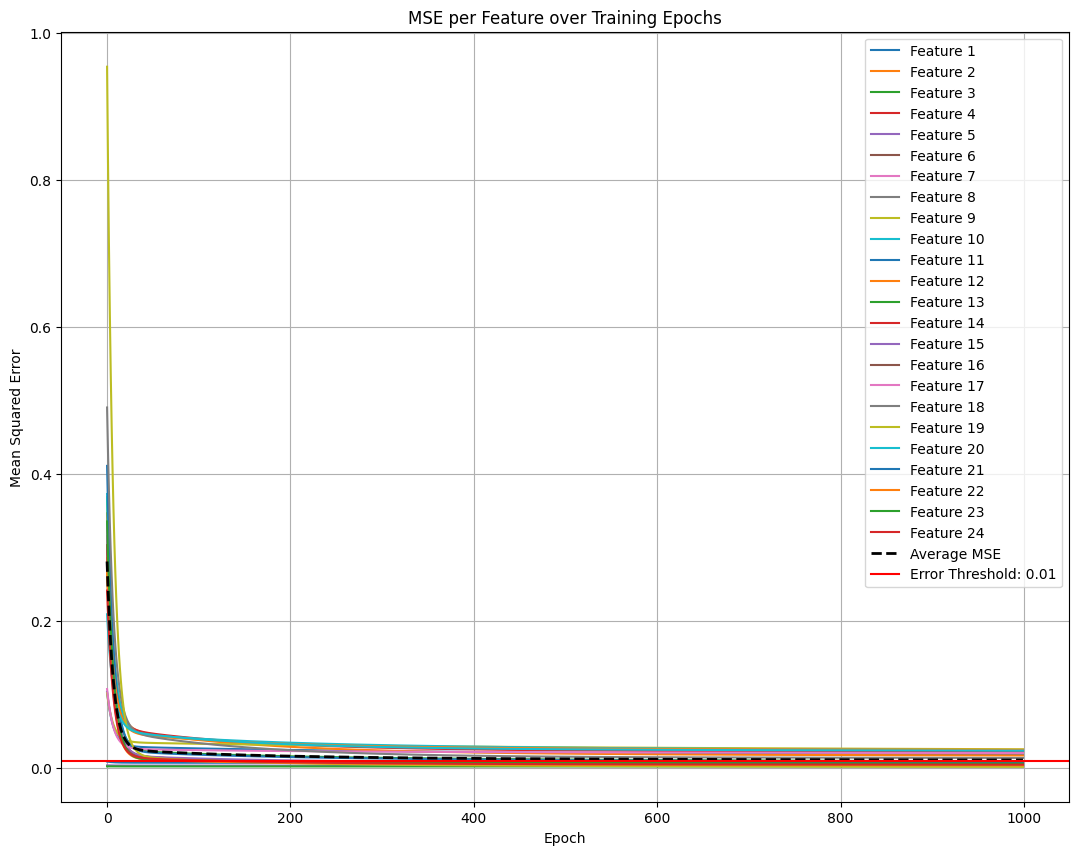

In [52]:
model_one_time = LinearRegression_Scratch(learning_rate=0.01, num_iter=1000,error_threshold=0.01)
model_one_time.fit(x_train_single, y_train_single)
predictions_one_time = model_one_time.predict(x_test_single)
mse_for_one_time = np.mean((predictions_one_time - y_test_single) ** 2,axis=0)
overall_mse_one_time = np.mean(mse_for_one_time)
model_one_time.plot_mse_history()

Epoch:  23%|██▎       | 233/1000 [00:00<00:00, 917.59it/s, MSE=0.010423]



Early stopping at epoch 233: Average MSE 0.009993 is below threshold 0.01
MSE for Feature 1: 0.016675
MSE for Feature 2: 0.015150
MSE for Feature 3: 0.010086
MSE for Feature 4: 0.016936
MSE for Feature 5: 0.003348
MSE for Feature 6: 0.003228
MSE for Feature 7: 0.005332
MSE for Feature 8: 0.004006
MSE for Feature 9: 0.023209
MSE for Feature 10: 0.021409
MSE for Feature 11: 0.009395
MSE for Feature 12: 0.019369
MSE for Feature 13: 0.002394
MSE for Feature 14: 0.004205
MSE for Feature 15: 0.006398
MSE for Feature 16: 0.004872
MSE for Feature 17: 0.019470
MSE for Feature 18: 0.011908
MSE for Feature 19: 0.002077
MSE for Feature 20: 0.018376
MSE for Feature 21: 0.006727
MSE for Feature 22: 0.004105
MSE for Feature 23: 0.006456
MSE for Feature 24: 0.004692


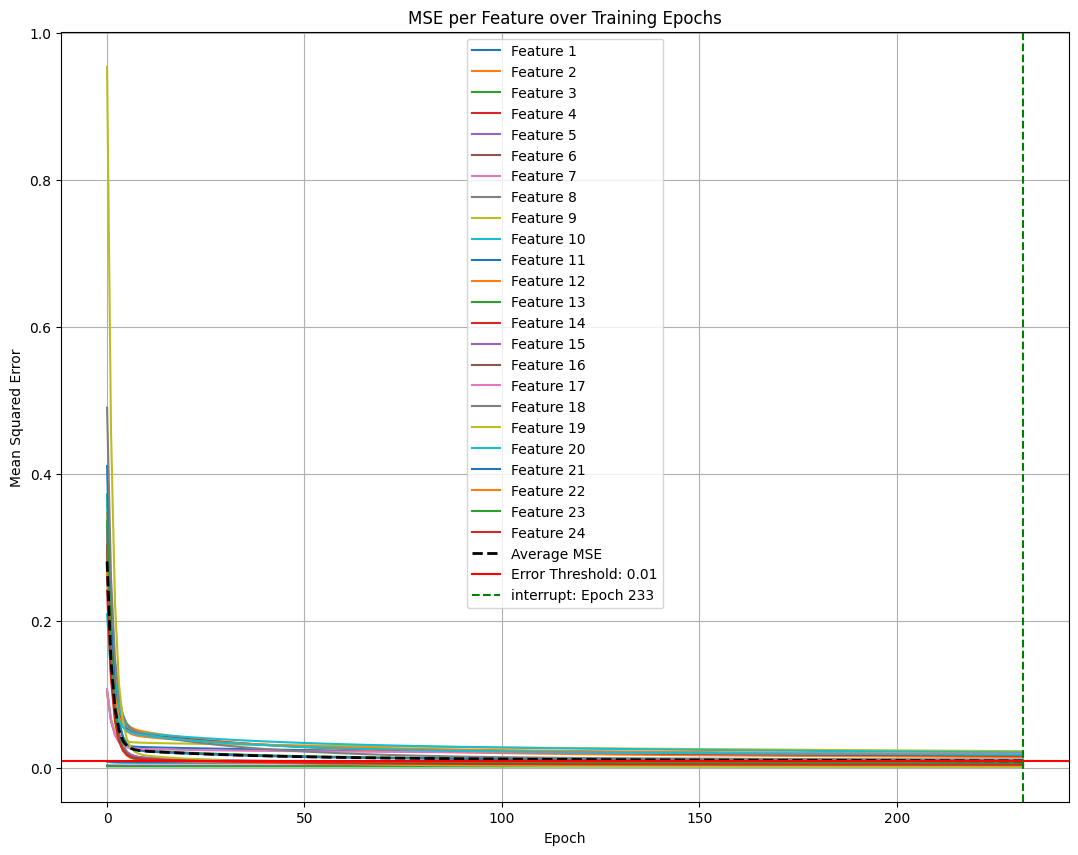

In [53]:
# Reshape the windowed data to 2D:
x_train_2d = x_train_window.reshape(x_train_window.shape[0], -1)  # Shape: (num_samples, window_size * num_features)
x_test_2d = x_test_window.reshape(x_test_window.shape[0], -1)  # Shape: (num_samples, window_size * num_features)


model_windowed = LinearRegression_Scratch(learning_rate=0.01, num_iter=1000, error_threshold=0.01)
model_windowed.fit(x_train_2d, y_train_window)
predictions_windowed = model_windowed.predict(x_test_2d)
mse_for_windowed = np.mean((predictions_windowed - y_test_window) ** 2, axis=0)
overall_mse_windowed = np.mean(mse_for_windowed)
model_windowed.plot_mse_history()


In [54]:
print(f"\nOverall MSE For Windowed: {overall_mse_windowed}\nOverall MSE for Single Time: {overall_mse_one_time}")


Overall MSE For Windowed: 0.010042205019182375
Overall MSE for Single Time: 0.011390322861144593


### Polynomial Regression (scratch)

In [55]:
class PolynomialRegression_Scratch:
    def __init__(self, degree=2, learning_rate=0.01, num_iter=1000, error_threshold=None):
        self.degree = degree
        self.learning_rate = learning_rate
        self.num_iter = num_iter
        self.weights = None
        self.bias = None
        self.mse_history = []
        self.error_threshold = error_threshold
        self.interrupt = False
        self.stopped_at_epoch = None

    def transform_polynomial_features(self, X):
        """Transforms the features into polynomial features up to the specified degree."""
        n_samples, n_features = X.shape
        X_poly = [np.ones(n_samples)]

        for d in range(1, self.degree + 1):
            for comb in combinations_with_replacement(range(n_features), d):
                feature = np.prod(X[:, comb], axis=1)
                X_poly.append(feature)

        return np.stack(X_poly, axis=1)

    def fit(self, X, y):
        # Transform X to polynomial features
        X_poly = self.transform_polynomial_features(X)
        num_samples, num_features = X_poly.shape
        _, num_labels = y.shape

        # Initialize parameters
        self.weights = np.zeros((num_features, num_labels))
        self.bias = np.zeros((num_labels))
        self.mse_history = []
        self.interrupt = False
        self.stopped_at_epoch = None

        progress_bar = tqdm(total=self.num_iter, desc="Epoch")

        for epoch in range(self.num_iter):
            y_pred = np.dot(X_poly, self.weights) + self.bias
            error = y_pred - y

            gradients_weights = (1 / num_samples) * np.dot(X_poly.T, error)
            gradients_bias = (1 / num_samples) * np.sum(error, axis=0)

            self.weights -= self.learning_rate * gradients_weights
            self.bias -= self.learning_rate * gradients_bias

            mse_per_feature = np.mean((y_pred - y) ** 2, axis=0)
            average_mse = np.mean(mse_per_feature)
            self.mse_history.append(mse_per_feature)

            progress_bar.update(1)

            if (epoch + 1) % 100 == 0:
                progress_bar.set_postfix(MSE=f"{average_mse:.6f}")

            if self.error_threshold is not None and average_mse < self.error_threshold:
                progress_bar.close()
                print(f"\nEarly stopping at epoch {epoch + 1}: Average MSE {average_mse:.6f} is below threshold {self.error_threshold}")
                for i, feature_mse in enumerate(mse_per_feature):
                    print(f"MSE for Feature {i+1}: {feature_mse:.6f}")
                self.interrupt = True
                self.stopped_at_epoch = epoch + 1
                return

        progress_bar.close()
        print(f"\nTraining completed after {len(self.mse_history)} epochs")
        print(f"Final average MSE: {average_mse:.6f}")
        for i, feature_mse in enumerate(mse_per_feature):
            print(f"MSE for Feature {i+1}: {feature_mse:.6f}")

    def predict(self, X):
        X_poly = self.transform_polynomial_features(X)
        return np.dot(X_poly, self.weights) + self.bias

    def plot_mse_history(self):
        import matplotlib.pyplot as plt

        mse_history_array = np.array(self.mse_history)
        plt.figure(figsize=(13, 10))

        for i in range(mse_history_array.shape[1]):
            plt.plot(mse_history_array[:, i], label=f'Feature {i+1}')

        avg_mse = np.mean(mse_history_array, axis=1)
        plt.plot(avg_mse, 'k--', linewidth=2, label='Average MSE')

        if self.error_threshold is not None:
            plt.axhline(y=self.error_threshold, color='r', linestyle='-',
                        label=f'Error Threshold: {self.error_threshold}')

        if self.interrupt:
            plt.axvline(x=self.stopped_at_epoch - 1, color='g', linestyle='--',
                        label=f'interrupt: Epoch {self.stopped_at_epoch}')

        plt.xlabel('Epoch')
        plt.ylabel('Mean Squared Error')
        plt.title('MSE per Feature over Training Epochs')
        plt.legend(loc='best')
        plt.grid(True)
        plt.show()


Epoch:  27%|██▋       | 273/1000 [00:01<00:05, 139.57it/s, MSE=0.010329]



Early stopping at epoch 273: Average MSE 0.009999 is below threshold 0.01
MSE for Feature 1: 0.015563
MSE for Feature 2: 0.016275
MSE for Feature 3: 0.005670
MSE for Feature 4: 0.020322
MSE for Feature 5: 0.003329
MSE for Feature 6: 0.003225
MSE for Feature 7: 0.004833
MSE for Feature 8: 0.004019
MSE for Feature 9: 0.021825
MSE for Feature 10: 0.020429
MSE for Feature 11: 0.005731
MSE for Feature 12: 0.022938
MSE for Feature 13: 0.002384
MSE for Feature 14: 0.004167
MSE for Feature 15: 0.005962
MSE for Feature 16: 0.005123
MSE for Feature 17: 0.017534
MSE for Feature 18: 0.013668
MSE for Feature 19: 0.004033
MSE for Feature 20: 0.021935
MSE for Feature 21: 0.007020
MSE for Feature 22: 0.003731
MSE for Feature 23: 0.005552
MSE for Feature 24: 0.004700


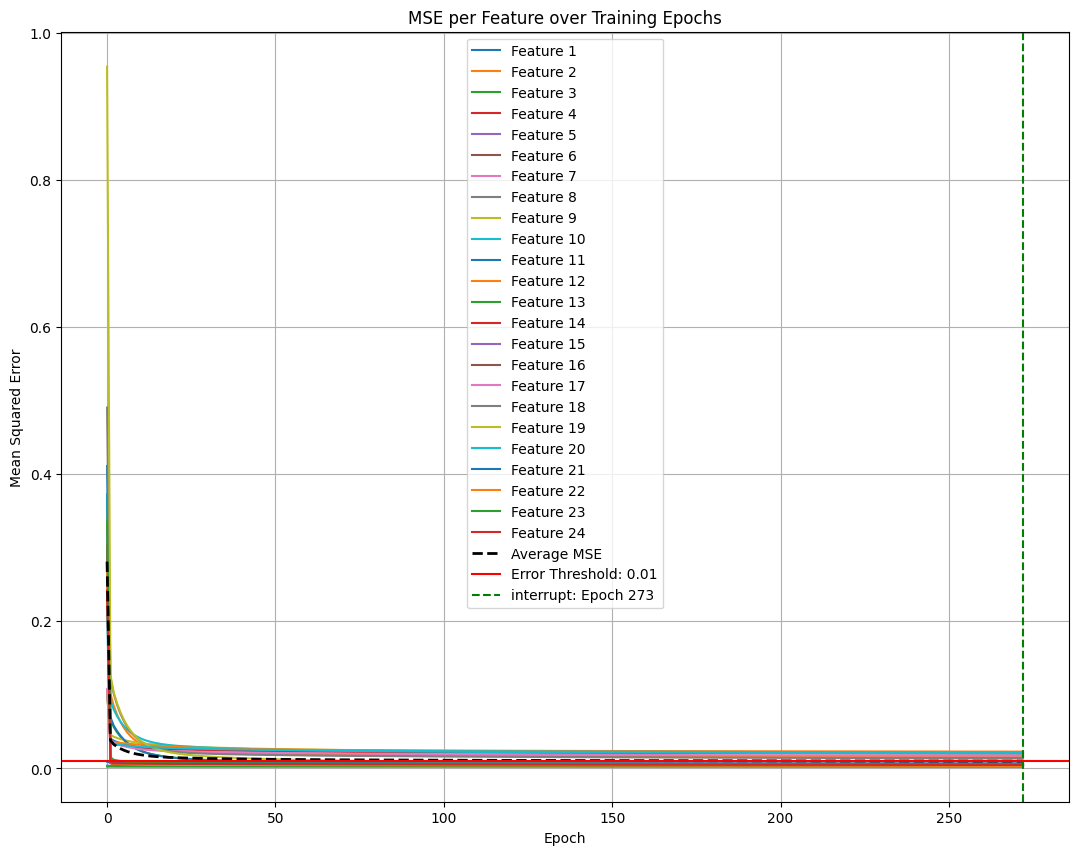

In [56]:
model_one_time_poly = PolynomialRegression_Scratch(degree=3, learning_rate=0.01, num_iter=1000, error_threshold=0.01)
model_one_time_poly.fit(x_train_single, y_train_single)
predictions_one_time = model_one_time_poly.predict(x_test_single)
mse_for_one_time = np.mean((predictions_one_time - y_test_single) ** 2,axis=0)
overall_mse_one_time = np.mean(mse_for_one_time)
model_one_time_poly.plot_mse_history()

In [57]:
"""# Reshape the windowed data to 2D:
x_train_2d = x_train_window.reshape(x_train_window.shape[0], -1)  # Shape: (num_samples, window_size * num_features)
x_test_2d = x_test_window.reshape(x_test_window.shape[0], -1)  # Shape: (num_samples, window_size * num_features)


model_windowed = PolynomialRegression_Scratch(degree=3, learning_rate=0.01, num_iter=1000, error_threshold=0.01)
model_windowed.fit(x_train_2d, y_train_window)
predictions_windowed = model_windowed.predict(x_test_2d)
mse_for_windowed = np.mean((predictions_windowed - y_test_window) ** 2, axis=0)
overall_mse_windowed = np.mean(mse_for_windowed)
model_windowed.plot_mse_history()"""

'# Reshape the windowed data to 2D:\nx_train_2d = x_train_window.reshape(x_train_window.shape[0], -1)  # Shape: (num_samples, window_size * num_features)\nx_test_2d = x_test_window.reshape(x_test_window.shape[0], -1)  # Shape: (num_samples, window_size * num_features)\n\n\nmodel_windowed = PolynomialRegression_Scratch(degree=3, learning_rate=0.01, num_iter=1000, error_threshold=0.01)\nmodel_windowed.fit(x_train_2d, y_train_window)\npredictions_windowed = model_windowed.predict(x_test_2d)\nmse_for_windowed = np.mean((predictions_windowed - y_test_window) ** 2, axis=0)\noverall_mse_windowed = np.mean(mse_for_windowed)\nmodel_windowed.plot_mse_history()'

### 1.2.1 sklearn

In [58]:
# single time

models = [
    ("Linear", LinearRegression()),
    #("Logitic", LogisticRegression()),
    #("Quantile", QuantileRegressor()),
    ("Elasticnet", ElasticNet()),
    ("Ridge", Ridge()),

    
]


for name, model in models:    
    model.fit(x_train_single, y_train_single)
    y_pred = model.predict(x_test_single)
    
    print(f'MSE of {name} Model: {mean_squared_error(y_test_single, y_pred)}\n')
    #print(f"Coefficients: \n {model.coef_}\n-------------------------------------------------------------------\n")
    


MSE of Linear Model: 0.009351189302340359

MSE of Elasticnet Model: 0.034757973018077114

MSE of Ridge Model: 0.009377923047410757



In [59]:
# sliding window

models = [
    ("Linear", LinearRegression()),
    #("Logitic", LogisticRegression()),
    #("Quantile", QuantileRegressor()),
    ("Elasticnet", ElasticNet()),
    ("Ridge", Ridge()),

    
]



for name, model in models:    
    model.fit(x_train_2d, y_train_window)
    y_pred = model.predict(x_test_2d)
    
    print(f'MSE of {name} Model: {mean_squared_error(y_test_window, y_pred)}\n')
    #print(f"Coefficients: \n {model.coef_}\n-------------------------------------------------------------------\n")
    


MSE of Linear Model: 4.332239094153011e-30

MSE of Elasticnet Model: 0.03456843681604208

MSE of Ridge Model: 1.7521803386689697e-05



## plus

### Data

In [60]:
filtered_columns = [col for col in data.columns if 'DATE' in col or 'MONTH' in col or 'BASEL' in col or 'BUDAPEST' in col]
df = data[filtered_columns]
drop_features=[
'BASEL_temp_min',

]

df = df.drop(drop_features,axis=1)
df

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,3.9,3,0.92,1.0268,0.52,0.00,3.7,-4.9,-0.7
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,4.8,8,0.94,1.0297,0.14,0.00,0.4,-3.6,-1.9
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,4.8,6,0.95,1.0295,0.19,0.00,0.0,-0.8,1.1
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,7.5,8,0.94,1.0252,0.21,0.00,0.0,-1.0,0.1
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,8.6,5,0.88,1.0235,0.43,0.00,0.8,0.2,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,7,0.82,1.0084,0.28,0.42,0.3,3.2,4.8,1,0.61,1.0072,0.65,0.00,6.1,3.5,7.0
3650,20091229,12,7,0.92,1.0028,0.22,1.68,0.2,4.5,10.0,3,0.59,1.0113,0.68,0.32,6.7,3.2,6.9
3651,20091230,12,8,0.92,0.9979,0.07,1.54,0.0,8.5,11.5,8,0.93,1.0040,0.18,0.12,0.0,1.8,3.5
3652,20091231,12,7,0.93,0.9958,0.17,0.57,0.1,6.6,7.9,6,0.90,0.9984,0.30,0.69,0.6,4.7,7.4


In [61]:
df_train = df.loc[(df['DATE']<20090101) | (df['DATE']>=20100101)]
df_train = pd.DataFrame(data=df_train.values, columns=df_train.columns)
df_train=df_train.drop(['DATE','MONTH'],axis=1)

df_test = df.loc[(df['DATE']>=20090101) & (df['DATE']<20100101)]
df_test = pd.DataFrame(data=df_test.values, columns=df_test.columns)
df_test=df_test.drop(['DATE','MONTH'],axis=1)

In [62]:
new_columns=[
'cloud_cover',	
'humidity',	
'pressure',	
'global_radiation',	
'precipitation',	
'sunshine',	
'temp_mean',	
'temp_max',
]

In [63]:
filtered_columns = [col for col in df_train.columns if 'BASEL' in col]
df_BASEL_train = df_train[filtered_columns]
df_BASEL_train = pd.DataFrame(data=df_BASEL_train.values,columns=new_columns)

filtered_columns = [col for col in df_test.columns if 'BASEL' in col]
df_BASEL_test = df_test[filtered_columns]
df_BASEL_test = pd.DataFrame(data=df_BASEL_test.values,columns=new_columns)
df_BASEL_test


,cloud_cover,humidity,pressure,global_radiation,precipitation,sunshine,temp_mean,temp_max
0,4.0,0.84,1.0284,0.63,0.00,7.1,1.5,3.6
1,8.0,0.89,1.0262,0.07,0.00,0.0,-1.0,1.0
2,5.0,0.72,1.0263,0.50,0.00,2.9,-3.1,-1.8
3,4.0,0.75,1.0239,0.62,0.00,5.4,-3.7,-1.3
4,8.0,0.84,1.0197,0.28,0.05,0.0,-4.1,-2.5
...,...,...,...,...,...,...,...,...
360,7.0,0.80,1.0118,0.37,0.18,2.3,1.0,5.5
361,7.0,0.82,1.0084,0.28,0.42,0.3,3.2,4.8
362,7.0,0.92,1.0028,0.22,1.68,0.2,4.5,10.0
363,8.0,0.92,0.9979,0.07,1.54,0.0,8.5,11.5


In [64]:
filtered_columns = [col for col in df_train.columns if 'BUDAPEST' in col]
df_BUDAPEST_train = df_train[filtered_columns]
df_BUDAPEST_train = pd.DataFrame(data=df_BUDAPEST_train.values,columns=new_columns)

filtered_columns = [col for col in df_test.columns if 'BUDAPEST' in col]
df_BUDAPEST_test = df_test[filtered_columns]
df_BUDAPEST_test = pd.DataFrame(data=df_BUDAPEST_test.values,columns=new_columns)
df_BUDAPEST_test


,cloud_cover,humidity,pressure,global_radiation,precipitation,sunshine,temp_mean,temp_max
0,8.0,0.78,1.0273,0.18,0.00,0.0,-5.8,-3.8
1,4.0,0.72,1.0257,0.18,0.00,0.0,-3.0,-0.6
2,3.0,0.63,1.0272,0.71,0.00,6.9,-3.2,0.6
3,7.0,0.69,1.0203,0.19,0.00,0.0,-3.7,0.0
4,8.0,0.67,1.0184,0.19,0.00,0.0,-2.2,0.4
...,...,...,...,...,...,...,...,...
360,8.0,0.66,1.0088,0.18,0.00,0.0,2.8,5.0
361,1.0,0.61,1.0072,0.65,0.00,6.1,3.5,7.0
362,3.0,0.59,1.0113,0.68,0.32,6.7,3.2,6.9
363,8.0,0.93,1.0040,0.18,0.12,0.0,1.8,3.5


In [65]:
scaler = MinMaxScaler()
scaler.fit(df_BASEL_train)
df_train_scaled=scaler.transform(df_BASEL_train)
df_BASEL_DE_train = pd.DataFrame(data=df_train_scaled,columns=df_BASEL_train.columns)

df_test_scaled=scaler.transform(df_BASEL_test)
df_BASEL_DE_test = pd.DataFrame(data=df_test_scaled,columns=df_BASEL_test.columns)

In [66]:
"""scaler = MinMaxScaler()
scaler.fit(df_BUDAPEST_train)
df_train_scaled=scaler.transform(df_BUDAPEST_train)
df_BUDAPEST_train = pd.DataFrame(data=df_train_scaled,columns=df_BUDAPEST_train.columns)"""

df_test_scaled=scaler.transform(df_BUDAPEST_test)
df_BUDAPEST_test = pd.DataFrame(data=df_test_scaled,columns=df_BUDAPEST_test.columns)
df_BUDAPEST_test

,cloud_cover,humidity,pressure,global_radiation,precipitation,sunshine,temp_mean,temp_max
0,1.000,0.666667,0.755435,0.037143,0.000000,0.000000,0.059459,0.042889
1,0.500,0.566667,0.726449,0.037143,0.000000,0.000000,0.135135,0.115124
2,0.375,0.416667,0.753623,0.188571,0.000000,0.450980,0.129730,0.142212
3,0.875,0.516667,0.628623,0.040000,0.000000,0.000000,0.116216,0.128668
4,1.000,0.483333,0.594203,0.040000,0.000000,0.000000,0.156757,0.137698
...,...,...,...,...,...,...,...,...
360,1.000,0.466667,0.420290,0.037143,0.000000,0.000000,0.291892,0.241535
361,0.125,0.383333,0.391304,0.171429,0.000000,0.398693,0.310811,0.286682
362,0.375,0.350000,0.465580,0.180000,0.042272,0.437908,0.302703,0.284424
363,1.000,0.916667,0.333333,0.037143,0.015852,0.000000,0.264865,0.207675


In [67]:
def sliding_window(df, window_size, stride=1):

    # Number of features
    n = df.shape[1]


    num_samples = (df.shape[0] - window_size) // stride + 1

    data = df.values  # Shape: (time_steps, features)

    # Create sliding window view
    windows = np.lib.stride_tricks.sliding_window_view(data, (window_size, n))

    windows = windows.reshape(num_samples,window_size,n)

    # Apply stride by selecting every 'stride' step
    windows = windows[::stride]  # Shape: (num_samples, window_size, n)

    return windows

In [68]:
# sliding window data

x_train_window_BASEL = sliding_window(df_BASEL_train,5,1)
x_test_window_BASEL = sliding_window(df_BASEL_test,5,1)

y_train_window_BASEL = df_BASEL_train.iloc[4:,:].values
y_test_window_BASEL = df_BASEL_test.iloc[4:,:].values


print(np.shape(x_train_window_BASEL))
print(np.shape(x_test_window_BASEL))
print(np.shape(y_train_window_BASEL))
print(np.shape(y_test_window_BASEL))

(3285, 5, 8)
(361, 5, 8)
(3285, 8)
(361, 8)


In [69]:
# sliding window data


x_test_window_BUDAPEST = sliding_window(df_BUDAPEST_test,5,1)
y_test_window_BUDAPEST = df_BUDAPEST_test.iloc[4:,:].values


print(np.shape(x_test_window_BUDAPEST))
print(np.shape(y_test_window_BUDAPEST))

(361, 5, 8)
(361, 8)


In [70]:
# single window data

x_train_single_BASEL = df_BASEL_train.iloc[0:-1].values
y_train_single_BASEL = df_BASEL_train.iloc[1:].values

x_test_single_BASEL = df_BASEL_test.iloc[0:-1].values
y_test_single_BASEL = df_BASEL_test.iloc[1:].values

In [71]:
# single window data

x_test_single_BUDAPEST = df_BUDAPEST_test.iloc[0:-1].values
y_test_single_BUDAPEST = df_BUDAPEST_test.iloc[1:].values

### Learning

In [72]:
class LinearRegression_Scratch:
    def __init__(self, learning_rate=0.01, num_iter=1000, error_threshold=None):
        self.learning_rate = learning_rate
        self.num_iter = num_iter
        self.weights = None
        self.bias = None
        self.mse_history = []  
        self.error_threshold = error_threshold  # Add error threshold parameter
        self.interrupt = False  # Flag to indicate if interrupt occurred
        self.stopped_at_epoch = None  # Store the epoch at which training stopped




    def fit(self, X, y):
        # Initialize weights and bias:
        num_samples, num_features = X.shape
        _, num_labels = y.shape
        self.weights = np.zeros((num_features, num_labels))  
        self.bias = np.zeros((num_labels))
        self.mse_history = [] 
        self.interrupt = False
        self.stopped_at_epoch = None

        # Create tqdm progress bar outside the loop
        progress_bar = tqdm(total=self.num_iter, desc="Epoch")

        # Gradient Descent:
        for epoch in range(self.num_iter):
            
            y_pred = np.dot(X, self.weights) + self.bias
            error = y_pred - y

            # Gradients
            gradients_weights = (1/num_samples) * np.dot(X.T, error)
            gradients_bias = (1/num_samples) * np.sum(error, axis=0)
            # Update Weights:
            self.weights -= self.learning_rate * gradients_weights
            self.bias -= self.learning_rate * gradients_bias

            # Calculate MSE for each feature
            mse_per_feature = np.mean((y_pred - y) ** 2, axis=0)
            average_mse = np.mean(mse_per_feature)  
            self.mse_history.append(mse_per_feature)

            
            progress_bar.update(1)   # Update progress bar for every epoch

            # Print MSE info every 100 epochs without disrupting progress bar
            if (epoch + 1) % 100 == 0:
                progress_bar.set_postfix(MSE=f"{average_mse:.6f}")

            # Check if error is below threshold for early stopping
            if self.error_threshold is not None and average_mse < self.error_threshold:
                progress_bar.close()  # Close the progress bar before printing message
                print(f"\nEarly stopping at epoch {epoch + 1}: Average MSE {average_mse:.6f} is below threshold {self.error_threshold}")
                for i, feature_mse in enumerate(mse_per_feature):
                    print(f"MSE for Feature {i+1}: {feature_mse:.6f}")
                self.interrupt = True
                self.stopped_at_epoch = epoch + 1
                return  # Exit the function

        # Close progress bar at the end
        progress_bar.close()

        # Final summary after all epochs or if stopped early
        print(f"\nTraining completed after {len(self.mse_history)} epochs")
        print(f"Final average MSE: {average_mse:.6f}")
        for i, feature_mse in enumerate(mse_per_feature):
            print(f"MSE for Feature {i+1}: {feature_mse:.6f}")




    def predict(self, X):
        return np.dot(X, self.weights) + self.bias




    def plot_mse_history(self):
        """Plot the MSE history for each feature"""
        import matplotlib.pyplot as plt

        mse_history_array = np.array(self.mse_history)
        plt.figure(figsize=(13, 10))

        # Plot individual feature MSEs
        for i in range(mse_history_array.shape[1]):
            plt.plot(mse_history_array[:, i], label=f'Feature {i+1}')

        # Plot average MSE across all features
        avg_mse = np.mean(mse_history_array, axis=1)
        plt.plot(avg_mse, 'k--', linewidth=2, label='Average MSE')

        # Add error threshold line if applicable
        if self.error_threshold is not None:
            plt.axhline(y=self.error_threshold, color='r', linestyle='-',
                        label=f'Error Threshold: {self.error_threshold}')

        # Mark early stopping point if applicable
        if self.interrupt:
            plt.axvline(x=self.stopped_at_epoch-1, color='g', linestyle='--',
                       label=f'interrupt: Epoch {self.stopped_at_epoch}')

        plt.xlabel('Epoch')
        plt.ylabel('Mean Squared Error')
        plt.title('MSE per Feature over Training Epochs')
        plt.legend(loc = 'best')
        plt.grid(True)
        plt.show()

#### Training and Testing BASEL

Epoch: 100%|██████████| 1000/1000 [00:00<00:00, 4682.03it/s, MSE=4.029308]



Training completed after 1000 epochs
Final average MSE: 4.029308
MSE for Feature 1: 4.594217
MSE for Feature 2: 0.022836
MSE for Feature 3: 0.021174
MSE for Feature 4: 0.425759
MSE for Feature 5: 0.283383
MSE for Feature 6: 13.080003
MSE for Feature 7: 4.534151
MSE for Feature 8: 9.272942


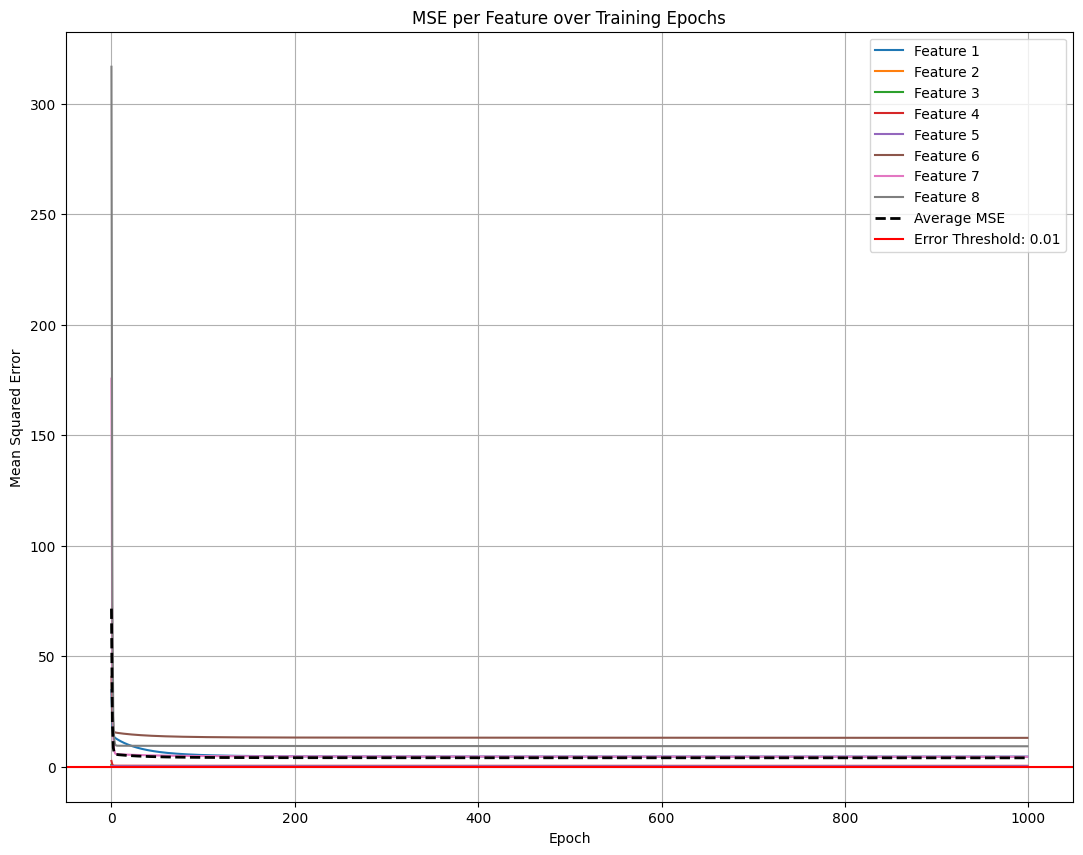

In [73]:
model_one_time = LinearRegression_Scratch(learning_rate=0.001, num_iter=1000,error_threshold=0.01)
model_one_time.fit(x_train_single_BASEL, y_train_single_BASEL)
predictions_one_time = model_one_time.predict(x_test_single_BASEL)
mse_for_one_time = np.mean((predictions_one_time - y_test_single_BASEL) ** 2,axis=0)
overall_mse_one_time = np.mean(mse_for_one_time)
model_one_time.plot_mse_history()

Epoch: 100%|██████████| 1000/1000 [00:00<00:00, 2281.31it/s, MSE=3.364122]



Training completed after 1000 epochs
Final average MSE: 3.364122
MSE for Feature 1: 3.982700
MSE for Feature 2: 0.006791
MSE for Feature 3: 0.001003
MSE for Feature 4: 0.236201
MSE for Feature 5: 0.258813
MSE for Feature 6: 10.236085
MSE for Feature 7: 4.543285
MSE for Feature 8: 7.648096


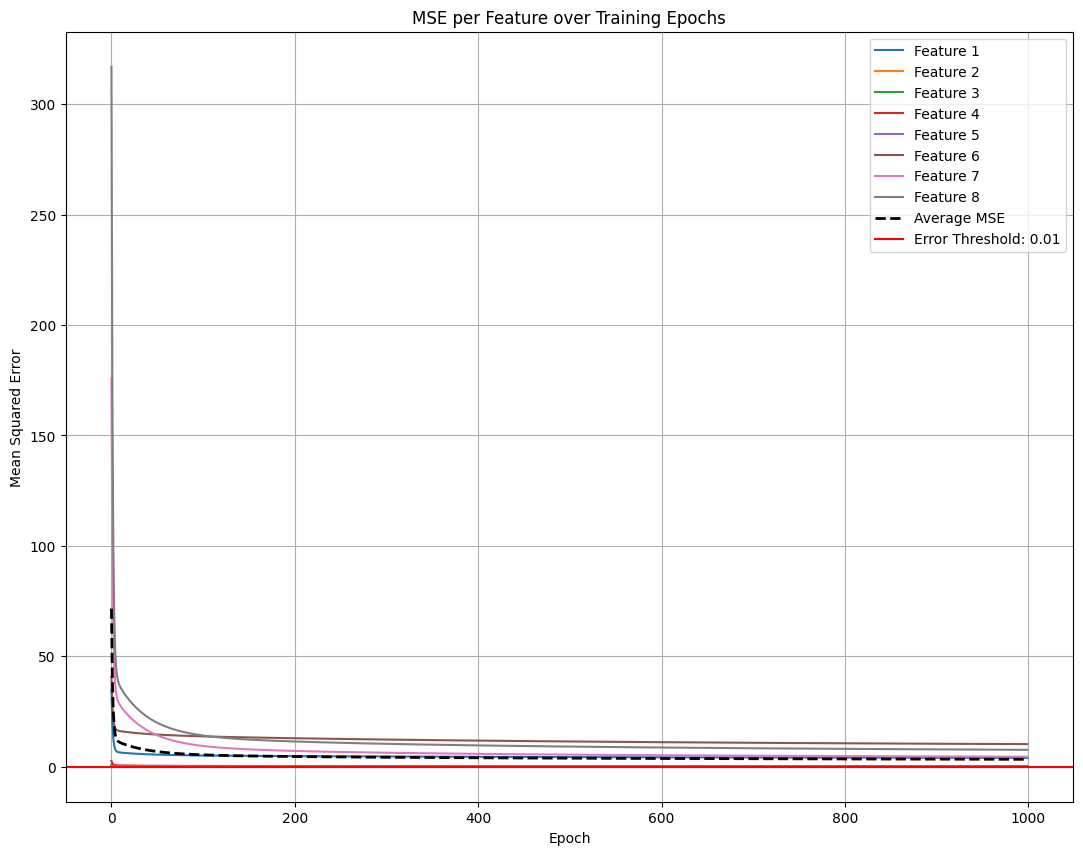

In [74]:
# Reshape the windowed data to 2D:
x_train_2d = x_train_window.reshape(x_train_window_BASEL.shape[0], -1)  # Shape: (num_samples, window_size * num_features)
x_test_2d = x_test_window.reshape(x_test_window_BASEL.shape[0], -1)  # Shape: (num_samples, window_size * num_features)


model_windowed = LinearRegression_Scratch(learning_rate=0.01, num_iter=1000, error_threshold=0.01)
model_windowed.fit(x_train_2d, y_train_window_BASEL)
predictions_windowed = model_windowed.predict(x_test_2d)
mse_for_windowed = np.mean((predictions_windowed - y_test_window_BASEL) ** 2, axis=0)
overall_mse_windowed = np.mean(mse_for_windowed)
model_windowed.plot_mse_history()


#### Implementing Basel Models on Budapest data

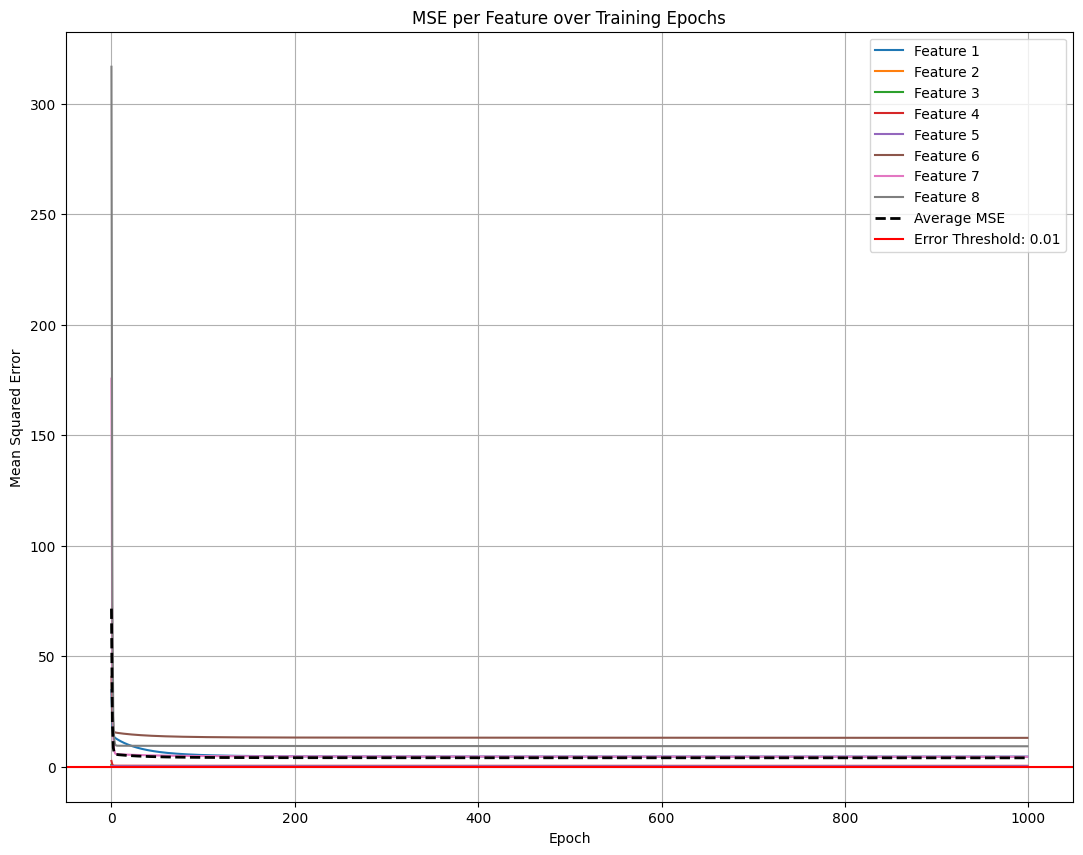

In [75]:
predictions_one_time = model_one_time.predict(x_test_single_BUDAPEST)
mse_for_one_time = np.mean((predictions_one_time - y_test_single_BUDAPEST) ** 2,axis=0)
overall_mse_one_time = np.mean(mse_for_one_time)
model_one_time.plot_mse_history()

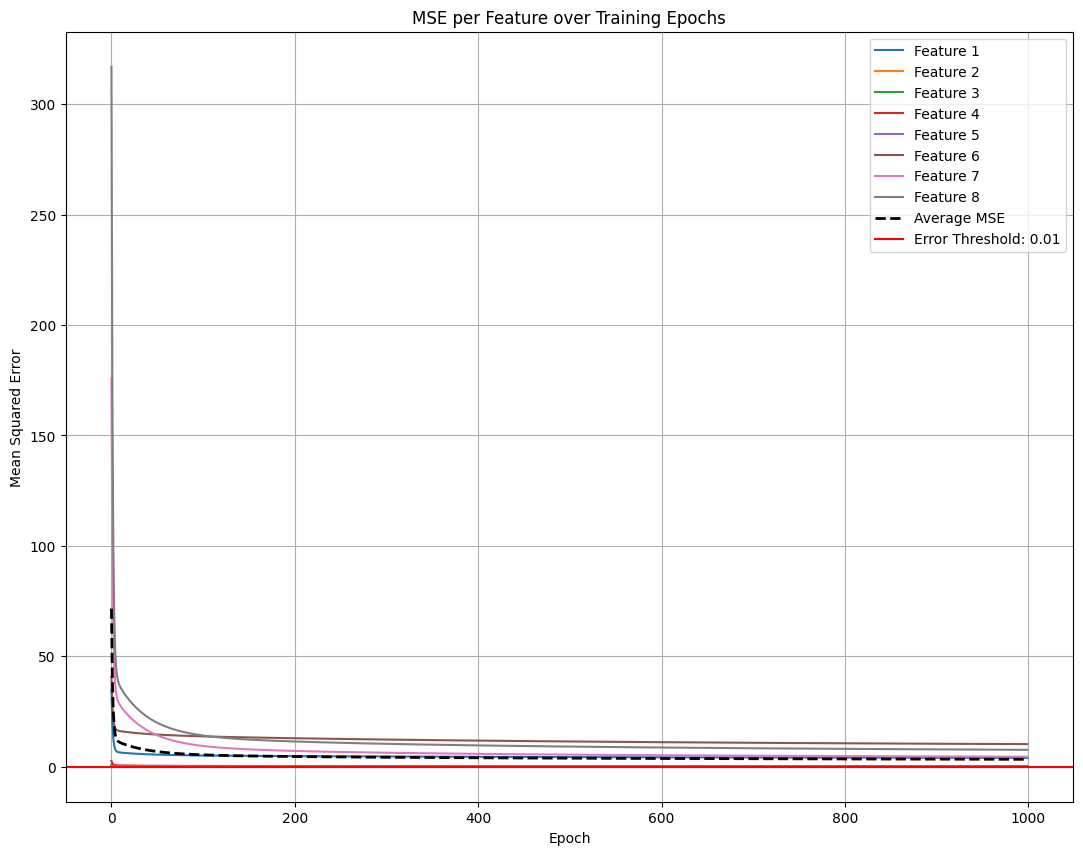

In [76]:
# Reshape the windowed data to 2D:

x_test_2d = x_test_window.reshape(x_test_window_BUDAPEST.shape[0], -1)  # Shape: (num_samples, window_size * num_features)


predictions_windowed = model_windowed.predict(x_test_2d)
mse_for_windowed = np.mean((predictions_windowed - y_test_window_BUDAPEST) ** 2, axis=0)
overall_mse_windowed = np.mean(mse_for_windowed)
model_windowed.plot_mse_history()